# HW2_Yue Shuai_3036226

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# 3_1

In [51]:
# data input                                                                                         
csvname = '/Users/Administrator/Desktop/python/student_debt.csv'
# data = np.loadtxt(csvname,delimiter = ',')

# load the data
def load_data(csvname):
    data = np.matrix(np.genfromtxt(csvname, delimiter=','))
    x = np.asarray(data[:,0])
    temp = np.ones((np.size(x),1))
    X = np.concatenate((temp,x),1)
    y = np.asarray(data[:,1])
#     y = y/y.max()
    return data,X,y

data,X,y = load_data(csvname)

In [52]:
from numpy.linalg import inv
a = np.dot(X.T, X)
b = np.dot(X.T, y)
w = np.dot(inv(a), b)
print (w)

[[-1.60729045e+02]
 [ 8.03244175e-02]]


In [53]:
def get_y(x):
    return x*w[1]+w[0]

In [54]:
#In year 2050
debt_2050 = 2050*w[1]+w[0]
print (debt_2050)

[3.93601056]


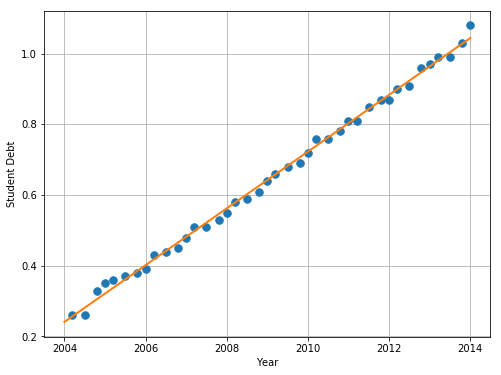

In [55]:
# print data

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(data[:,0], data[:,1],'.',markersize=15)
ax.plot([2004,2014],[get_y(2004),get_y(2014)], lw=2)
ax.set_xlabel("Year")
ax.set_ylabel("Student Debt")
ax.grid()
plt.show()



# 3_10

In [56]:
data,X,y = load_data('/Users/Administrator/Desktop/python/bacteria_data.csv')

In [57]:
y_new = [np.log(y[x]/(1-y[x])) for x in range(len(y))]

In [58]:
from numpy.linalg import inv
a = np.dot(X.T, X)
b = np.dot(X.T, y_new)
w = np.dot(inv(a), b)
print (w)

[[-3.57527391]
 [ 0.31386916]]


In [59]:
def get_y(x):
    return x*w[1]+w[0]

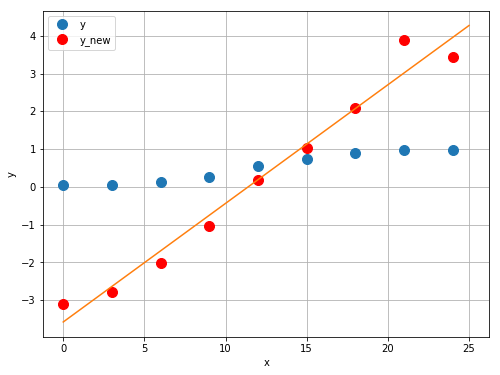

In [60]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(data[:,0], data[:,1],'.', markersize=20, label="y" )
ax.plot(data[:,0], y_new,'.', color = 'red', markersize=20, label="y_new")
ax.plot([0,25],[get_y(0),get_y(25)])
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid()
plt.show()

# 3_11

In [61]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import csv
import math

In [62]:
# load the data
def load_data(csvname):
    data = np.matrix(np.genfromtxt(csvname, delimiter=','))
    x = np.asarray(data[:,0])
    temp = np.ones((np.size(x),1))
    X = np.concatenate((temp,x),1)
    y = np.asarray(data[:,1])
    y = y/y.max()
    return X,y

In [63]:
# run gradient descent
def gradient_descent(X,y,w0):
    w_path = []                 # container for weights learned at each iteration
    cost_path = []              # container for associated objective values at each iteration
    w_path.append(w0)
    cost = compute_cost(w0)
    cost_path.append(cost)
    w = w0

    # start gradient descent loop
    max_its = 5000
    alpha = 10**(-2)
    for k in range(max_its):
        # YOUR CODE GOES HERE - compute gradient
        
        temp = 1/(1 + my_exp(-np.dot(X,w))) 
        temp_grad = 2* (temp-y)*temp*(1-temp)
        grad = np.dot(X.T,temp_grad)

    
        # take gradient step
        w = w - alpha*grad

        # update path containers
        w_path.append(w)
        cost = compute_cost(w)
        cost_path.append(cost)

    # reshape containers for use in plotting in 3d
    w_path = np.asarray(w_path)
    w_path.shape = (np.shape(w_path)[0],2)
        
    cost_path = np.asarray(cost_path)
    cost_path.shape = (np.size(cost_path),1)

    return w_path,cost_path

# calculate the cost value for a given input weight w
def compute_cost(w):
    temp = 1/(1 + my_exp(-np.dot(X,w))) - y
    temp = np.dot(temp.T,temp)
    return temp

# avoid overflow when using exp - just cutoff after arguments get too large/small
def my_exp(u):
    s = np.argwhere(u > 100)
    t = np.argwhere(u < -100)
    u[s] = 0
    u[t] = 0
    u = np.exp(u)
    u[t] = 1
    return u

In [64]:
# used by plot_logistic_surface to make objective surface of logistic regression cost function
def add_layer(a,b,c):
    a.shape = (2,1)
    b.shape = (1,1)
    z = my_exp(-np.dot(c,a))
    z = 1/(1 + z) - b
    z = z**2
    return z

# plot fit to data and corresponding gradient descent path onto the logistic regression objective surface
def show_fit(w_path,ax,col):
    # plot solution of gradient descent fit to original data
    s = np.linspace(0,25,100)
    t = 1/(1 + my_exp(-(w_path[-1,0] + w_path[-1,1]*s)))
    ax.plot(s,t,color = col)

# plot gradient descent paths on cost surface
def show_paths(w_path,cost_path,ax,col):           
    # plot grad descent path onto surface
    ax.plot(w_path[:,0],w_path[:,1],cost_path[:,0],color = col,linewidth = 5)   # add a little to output path so its visible on top of the surface plot
    
# plot logistic regression surface
def plot_surface(ax):
    # plot logistic regression surface
    r = np.linspace(-3,3,150)
    s,t = np.meshgrid(r, r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)


    # build 3d surface
    surf = np.zeros((np.size(s),1))
    max_its = np.size(y)
    for i in range(0,max_its):
        surf = surf + add_layer(X[i,:],y[i],h)

    s = np.reshape(s,(int(math.sqrt(np.size(s))),int(math.sqrt(np.size(s)))))
    t = np.reshape(t,(int(math.sqrt(np.size(t))),int(math.sqrt(np.size(t)))))
    surf = np.reshape(surf,(int(math.sqrt(np.size(surf))),int(math.sqrt(np.size(surf)))))

    # plot 3d surface
    ax.plot_surface(s,t,surf,cmap = 'jet')
    ax.azim = 175
    ax.elev = 20
    
# plot points
def plot_points(X,y,ax):
    ax.plot(X[:,1],y,'ko')

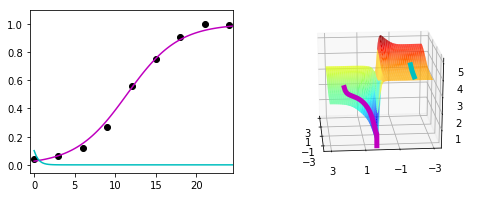

In [65]:
# load dataset
X,y = load_data('/Users/Administrator/Desktop/python/bacteria_data.csv') # load in data

# initialize figure, plot data, and dress up panels with axes labels etc.,
fig = plt.figure(facecolor = 'white',figsize = (8,3))
ax1 = fig.add_subplot(121)
ax1.set_xlim(min(X[:,1])-0.5, max(X[:,1])+0.5)
ax1.set_ylim(min(y)-0.1,max(y)+0.1)
# ax1.axis('off')

ax2 = fig.add_subplot(122, projection='3d')
ax2.xaxis.set_rotate_label(False)
ax2.yaxis.set_rotate_label(False)
ax2.zaxis.set_rotate_label(False)
ax2.get_xaxis().set_ticks([-3,-1,1,3])
ax2.get_yaxis().set_ticks([-3,-1,1,3])
# ax2.axis('off')

### run gradient descent with first initial point
w0 = np.array([0,2])
w0.shape = (2,1)
w_path, cost_path = gradient_descent(X,y,w0)
# print (w_path)

# plot points
plot_points(X,y,ax1)

# plot fit to data and path on objective surface
show_fit(w_path,ax1,'m')
show_paths(w_path,cost_path,ax2,'m')

### run gradient descent with first initial point
w0 = np.array([0,-2])
w0.shape = (2,1)
w_path, cost_path = gradient_descent(X,y,w0)

# plot fit to data and path on objective surface
show_fit(w_path,ax1,'c')
show_paths(w_path,cost_path,ax2,'c')
plot_surface(ax2)
plt.show()

# 3_13

In [66]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import csv
import math

In [67]:
# load the data
def load_data(csvname):
    data = np.matrix(np.genfromtxt(csvname, delimiter=','))
    x = np.asarray(data[:,0])
    temp = np.ones((np.size(x),1))
    X = np.concatenate((temp,x),1)
    y = np.asarray(data[:,1])
    y = y/y.max()
    return X,y

In [68]:
# run gradient descent
def gradient_descent(X,y,w0,lam):
    w_path = []                 # container for weights learned at each iteration
    cost_path = []              # container for associated objective values at each iteration
    w_path.append(w0)
    cost = compute_cost(w0)
    cost_path.append(cost)
    w = w0


    
    # start gradient descent loop
    max_its = 5000
    alpha = 10**(-2)
    for k in range(max_its):
        # YOUR CODE GOES HERE - compute gradient
        
        w_new = np.array([np.array([0]), w[1]])
        
        temp = 1/(1 + my_exp(-np.dot(X,w))) 
        temp_grad = 2* (temp-y)*temp*(1-temp)
        grad = np.dot(X.T,temp_grad)+2*lam*w_new
        
        # take gradient step
        w = w - alpha*grad

        # update path containers
        w_path.append(w)
        cost = compute_cost(w)
        cost_path.append(cost)

    # reshape containers for use in plotting in 3d
    w_path = np.asarray(w_path)
    w_path.shape = (np.shape(w_path)[0],2)
        
    cost_path = np.asarray(cost_path)
    cost_path.shape = (np.size(cost_path),1)

    return w_path,cost_path

# calculate the cost value for a given input weight w
def compute_cost(w):
    temp = 1/(1 + my_exp(-np.dot(X,w))) - y
    temp = np.dot(temp.T,temp)
    return temp

# avoid overflow when using exp - just cutoff after arguments get too large/small
def my_exp(u):
    s = np.argwhere(u > 100)
    t = np.argwhere(u < -100)
    u[s] = 0
    u[t] = 0
    u = np.exp(u)
    u[t] = 1
    return u

In [69]:
# used by plot_logistic_surface to make objective surface of logistic regression cost function
def add_layer(a,b,c):
    a.shape = (2,1)
    b.shape = (1,1)
    z = my_exp(-np.dot(c,a))
    z = 1/(1 + z) - b
    z = z**2
    return z

# plot fit to data and corresponding gradient descent path onto the logistic regression objective surface
def show_fit(w_path,ax,col, lw):
    # plot solution of gradient descent fit to original data
    s = np.linspace(0,25,100)
    t = 1/(1 + my_exp(-(w_path[-1,0] + w_path[-1,1]*s)))
    ax.plot(s,t,color = col, lw=lw)

# plot gradient descent paths on cost surface
def show_paths(w_path,cost_path,ax,col):           
    # plot grad descent path onto surface
    ax.plot(w_path[:,0],w_path[:,1],cost_path[:,0],color = col,linewidth = 5)   # add a little to output path so its visible on top of the surface plot
    
# plot logistic regression surface
def plot_surface(ax,lam):
    # plot logistic regression surface
    r = np.linspace(-3,3,150)
    s,t = np.meshgrid(r, r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    # build 3d surface
    surf = np.zeros((np.size(s),1))
    max_its = np.size(y)
    for i in range(0,max_its):
        surf = surf + add_layer(X[i,:],y[i],h)
    surf = surf + lam*t**2

    s = np.reshape(s,(int(math.sqrt(np.size(s))),int(math.sqrt(np.size(s)))))
    t = np.reshape(t,(int(math.sqrt(np.size(t))),int(math.sqrt(np.size(t)))))
    surf = np.reshape(surf,(int(math.sqrt(np.size(surf))),int(math.sqrt(np.size(surf)))))
    
    
    # plot 3d surface
    ax.plot_surface(s,t,surf,cmap = 'jet')
    ax.azim = 175
    ax.elev = 20
    
# plot points
def plot_points(X,y,ax):
    ax.plot(X[:,1],y,'ko')

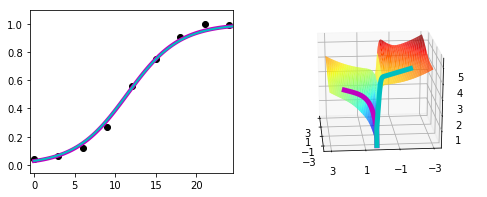

In [70]:
# load dataset
X,y = load_data('/Users/Administrator/Desktop/python/bacteria_data.csv') # load in data


# initialize figure, plot data, and dress up panels with axes labels etc.,
fig = plt.figure(facecolor = 'white',figsize = (8,3))
ax1 = fig.add_subplot(121)
ax1.set_xlim(min(X[:,1])-0.5, max(X[:,1])+0.5)
ax1.set_ylim(min(y)-0.1,max(y)+0.1)
# ax1.axis('off')

ax2 = fig.add_subplot(122, projection='3d')
ax2.xaxis.set_rotate_label(False)
ax2.yaxis.set_rotate_label(False)
ax2.zaxis.set_rotate_label(False)
ax2.get_xaxis().set_ticks([-3,-1,1,3])
ax2.get_yaxis().set_ticks([-3,-1,1,3])
# ax2.axis('off')

# define regularizer parameter
lam = 10**-1

### run gradient descent with first initial point
w0 = np.array([0,2])
w0.shape = (2,1)
w_path, cost_path = gradient_descent(X,y,w0,lam)

# plot points
plot_points(X,y,ax1)

# plot fit to data and path on objective surface
show_fit(w_path,ax1,'m', 4)
show_paths(w_path,cost_path,ax2,'m')

### run gradient descent with first initial point
w0 = np.array([0,-2])
w0.shape = (2,1)
w_path, cost_path = gradient_descent(X,y,w0,lam)

# plot fit to data and path on objective surface
show_fit(w_path,ax1,'c',2)
show_paths(w_path,cost_path,ax2,'c')
plot_surface(ax2,lam)
plt.show()